In [24]:

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./BTC-USD.csv')

print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

print(df.head())

Total number of days present in the dataset:  2713
Total number of fields present in the dataset:  7
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [7]:
print(df.info())
# Checking for null values
print("Null Values in Data: ",df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB
None
Null Values in Data:  0


In [9]:
# checking for duplicate values
print(df.duplicated().sum())

0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


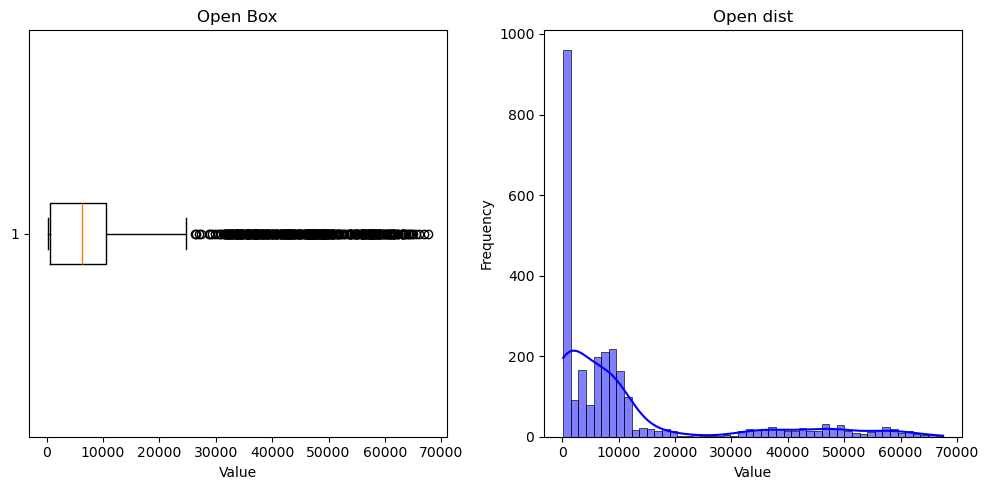

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


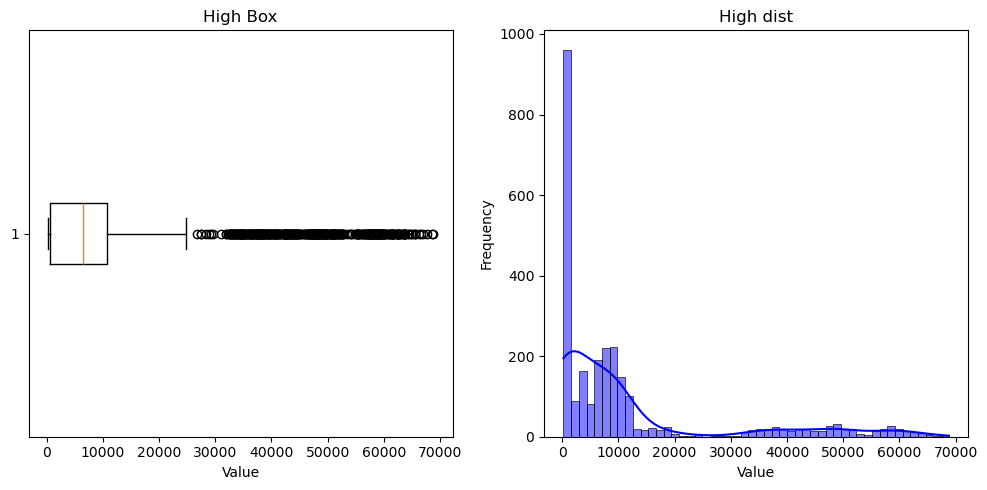

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


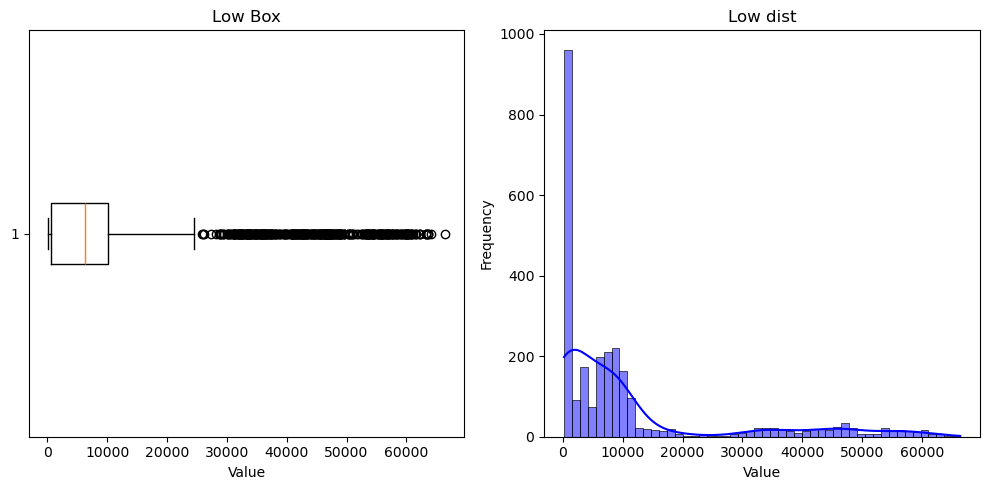

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


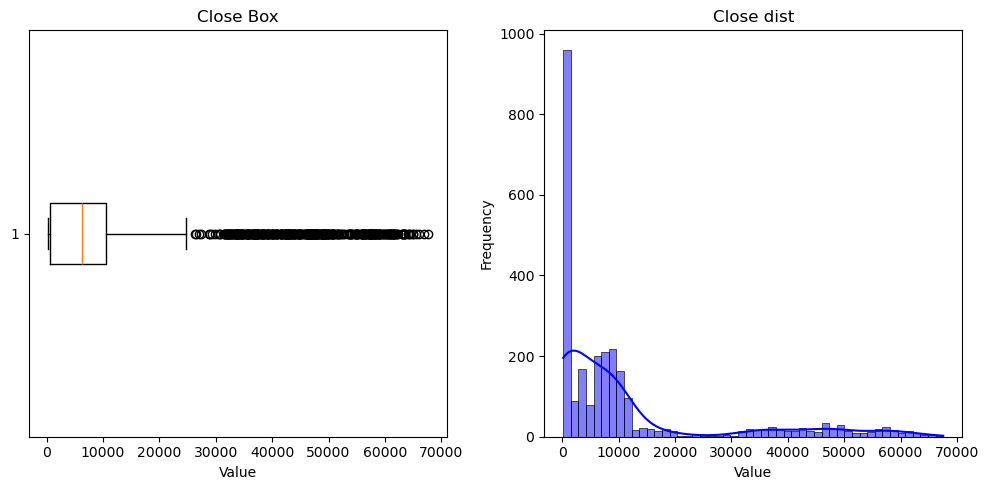

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


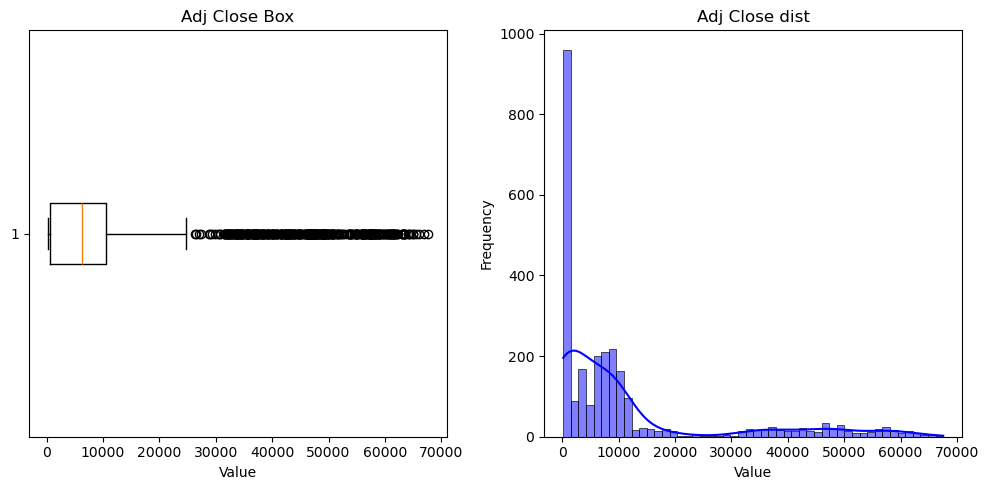

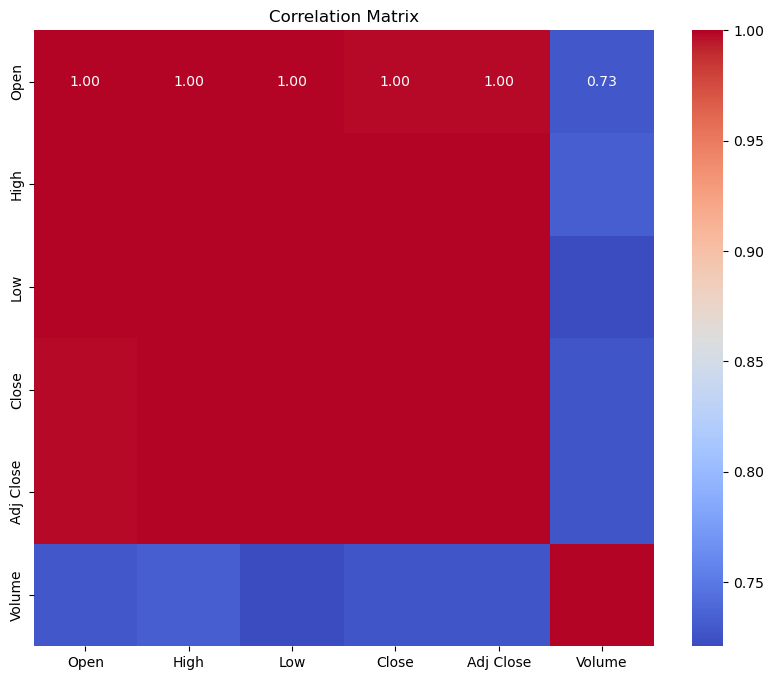

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999103  0.998839   0.998839  0.728537
High       0.999535  1.000000  0.999046  0.999489   0.999489  0.732137
Low        0.999103  0.999046  1.000000  0.999399   0.999399  0.720922
Close      0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Adj Close  0.998839  0.999489  0.999399  1.000000   1.000000  0.727443
Volume     0.728537  0.732137  0.720922  0.727443   0.727443  1.000000


In [13]:

# Convert the 'Date' column to datetime format for better handling
df['Date'] = pd.to_datetime(df['Date'])

# Identify outliers using box plots and histograms
columns = df.columns
for column in columns:
    if df[column].dtype == 'float64':
        fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(10, 5))

        ax_box.boxplot(df[column], vert=False, whis=1.5)
        ax_box.set_xlabel('Value')
        ax_box.set_title(f'{column} Box')

        sns.histplot(df[column], bins=50, color='blue', kde=True, ax=ax_hist)
        ax_hist.set_xlabel('Value')
        ax_hist.set_ylabel('Frequency')
        ax_hist.set_title(f'{column} dist')

        # Show plot
        plt.tight_layout()
        plt.show()

# Calculate the correlation matrix, excluding the 'Date' column
correlation_matrix = df.drop(columns=['Date']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

Exploratory Data Analysis

In [4]:
# Printing the start date and End date of the dataset

sd=df.iloc[0,0]
ed=df.iloc[-1,0]

print('Dataset Date Range:')
print('-'*30)
print('Starting Date - ',sd)
print('Ending Date - ',ed)


Dataset Date Range:
------------------------------
Starting Date -  2014-09-17
Ending Date -  2022-02-19


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
def stock_open_close_analysis(monthvise):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['Open'],
        name='Stock Open Price',
        marker_color='crimson'
    ))
    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['Close'],
        name='Stock Close Price',
        marker_color='lightsalmon'
    ))
    fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                      title='Monthwise comparision between Stock open and close price')
    fig.show()

def monthwise_high_low_analysis(yd, maindf, new_order):
    # Monthwise High and Low stock price
    yd.groupby(yd['Date'].dt.strftime('%B'))['Low'].min()
    monthvise_high = yd.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
    monthvise_high = monthvise_high.reindex(new_order, axis=0)
    
    monthvise_low = yd.groupby(yd['Date'].dt.strftime('%B'))['Low'].min()
    monthvise_low = monthvise_low.reindex(new_order, axis=0)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=monthvise_high.index,
        y=monthvise_high,
        name='Stock high Price',
        
        marker_color='rgb(0, 153, 204)'
    ))
    fig.add_trace(go.Bar(
        x=monthvise_low.index,
        y=monthvise_low,
        name='Stock low Price',
        marker_color='rgb(255, 128, 0)'
    ))
    
    fig.update_layout(barmode='group', 
                      title=' Monthwise High and Low stock price')
    fig.show()


def stock_price_analysis(yd):
    # Plotting the stock price trend
    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

    fig = px.line(yd, x=yd.Date, y=[yd['Open'], yd['Close'], 
                                              yd['High'], yd['Low']],
                 labels={'Date': 'Date','value':'Stock value'})
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    fig.show()

# Analyzing the trend of the stock price over the years
def eda(maindf,start_date,end_date):

       # Filtering the data between the start and end date
    yd = maindf.loc[(maindf['Date'] >= start_date)
                     & (maindf['Date'] <= end_date)]
    yd.drop(yd[['Adj Close','Volume']],axis=1)

    monthvise= yd.groupby(yd['Date'].dt.strftime('%B'))[['Open','Close']].mean()
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
    monthvise = monthvise.reindex(new_order, axis=0)


    stock_open_close_analysis(yd)

    monthwise_high_low_analysis(yd, maindf, new_order)

    stock_price_analysis(yd)
    

In [12]:
# Analyzing the trend of the stock price over the years
def eda(maindf,start_date,end_date):

    # Filtering the data between the start and end date
    yd = maindf.loc[(maindf['Date'] >= start_date)
                     & (maindf['Date'] <= end_date)]
    yd.drop(yd[['Adj Close','Volume']],axis=1)
    monthvise= yd.groupby(yd['Date'].dt.strftime('%B'))[['Open','Close']].mean()
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
    monthvise = monthvise.reindex(new_order, axis=0)
    
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['Open'],
        name='Stock Open Price',
        marker_color='crimson'
    ))
    fig.add_trace(go.Bar(
        x=monthvise.index,
        y=monthvise['Close'],
        name='Stock Close Price',
        marker_color='lightsalmon'
    ))
    fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                      title='Monthwise comparision between Stock open and close price')
    fig.show()
    

    # Monthwise High and Low stock price
    yd.groupby(yd['Date'].dt.strftime('%B'))['Low'].min()
    monthvise_high = yd.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
    monthvise_high = monthvise_high.reindex(new_order, axis=0)
    
    monthvise_low = yd.groupby(yd['Date'].dt.strftime('%B'))['Low'].min()
    monthvise_low = monthvise_low.reindex(new_order, axis=0)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=monthvise_high.index,
        y=monthvise_high,
        name='Stock high Price',
        
        marker_color='rgb(0, 153, 204)'
    ))
    fig.add_trace(go.Bar(
        x=monthvise_low.index,
        y=monthvise_low,
        name='Stock low Price',
        marker_color='rgb(255, 128, 0)'
    ))
    
    fig.update_layout(barmode='group', 
                      title=' Monthwise High and Low stock price')
    fig.show()

    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

    fig = px.line(yd, x=yd.Date, y=[yd['Open'], yd['Close'], 
                                              yd['High'], yd['Low']],
                 labels={'Date': 'Date','value':'Stock value'})
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    fig.show()


In [13]:
eda(df,'2014-09-17','2014-12-31')

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Overall Analysis from 2014-2022

In [ ]:
# Analyzing the trend of the stock price over the years
def stock_analysis_chart(maindf,start_date,end_date):

    # Filtering the data between the start and end date
    yd = maindf.loc[(maindf['Date'] >= start_date)
                     & (maindf['Date'] <= end_date)]
    yd.drop(yd[['Adj Close','Volume']],axis=1)

   
    names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

    fig = px.line(yd, x=yd.Date, y=[yd['Open'], yd['Close'], 
                                              yd['High'], yd['Low']],
                 labels={'Date': 'Date','value':'Stock value'})
    fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    fig.show()


stock_analysis_chart(df,'2014-09-17','2022-02-19')

Building LSTM Model

In [16]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)


Shape of close dataframe: (2713, 2)


In [17]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [19]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])
closedf


Total data for prediction:  365


,Date,Close
2348,2021-02-20,56099.519531
2349,2021-02-21,57539.945313
2350,2021-02-22,54207.320313
2351,2021-02-23,48824.425781
2352,2021-02-24,49705.332031
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


In [20]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [26]:
# deleting date column and normalizing using MinMax Scaler

# del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)    

(365, 1)


In [27]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (146, 1)


In [28]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [29]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)


X_train:  (203, 15)
y_train:  (203,)
X_test:  (130, 15)
y_test (130,)


In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape) 

X_train:  (203, 15, 1)
X_test:  (130, 15, 1)


In [32]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [33]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3194 - val_loss: 0.4546
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2759 - val_loss: 0.3884
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2632 - val_loss: 0.3250
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1995 - val_loss: 0.2660
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1702 - val_loss: 0.2098
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1365 - val_loss: 0.1571
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0899 - val_loss: 0.1093
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0637 - val_loss: 0.0678
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - val_loss: 0.0348
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0262 - val_loss: 0.0145
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - val_loss: 0.0080
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - val_loss: 0.0071


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()